# Clustering

### Hierarchical clustering:
- Clustering approach in which cluster boundaries are nested to each other, creating a parent/child relationship.
- This nested structure between clusters creates a hierarchy, that is often represented in the form of a cluster tree, known as dendogram

### Partitional Clustering:
- Each cluster boundary is independent of the others. There is no hierarchy between clusters. Dividing data objects into non overlapping groups.
- No object can be a member of more than one cluster, and each cluster have at least one object

### Overlaping Clustering
- Approach in which the boundary of one cluster can overlap that of another. Each object of the dataset can be member of one or more clusters. 
- There is no parent-child relationship here, the boundaries of the child not always are in the boundaries of the parent

### Fuzzy/soft clustering
- the membership of an item to a particulary cluster, is based on a membership weight that goes between 0 and 1. The larger the weight, the greater the item belongs to a particular cluster.
- If the weight is 0, the item absolutely does not belong to the cluster. If the weight is 1, then the item absolutely belong to the cluster.

### Density based clustering
- Determine cluster assignments based on the density of data points in a region
- Clusters are assign where there are high densities of data points separated by low density regions

## The k-Means belongs to partitional clustering
- Used for market segmentation, social network analysis, search result grouping and anomaly detection
- How many clusters 'k' do we want?
- The algorithm uses a process known as expectation maximization to assign every item to one and only one cluster
- Calculates the Euclidian distance between each point and each of the clusters centers

### How to choose the right 'k'?
- Based on a priori knowledge or business requirements
- Using a rule of thumb, such as k ~= (n/2)^(1/2), where 'n' = number of observations. But only with small datasets
- Using one or more statistical measures, such as the Elbow method, the average Silhouete method and the Calinski-Harabasz Score

### WCSS - Within-cluster sum of squares quantifies the degree of similarity between items in a cluster
- the wcss is the sum of the squared distances from each item in the cluster to the cluster centroid
- as the value of k increases, the items in each cluster become closer and the WCSS becomes smaller


<img src="images/wcss.png" width=400>

### The Elbow Method
- Based on the WCSS, choose K at the most significant inflection point between WCSS and the number of cluster, i.e. increasing the value of k, no longer yields a significant reduction of WCSS

<img src="images/elbow.png" width=400>

### The Average Silhouette Method
- The silhouette of an item is a measure of how closely the item is matched with other items within the same cluster, and how loosely it is matched with items in neighboring clusters
    - The higher is the silhouette value of an item, the more likely that it is in the right cluster
    - The range is -1 to 1, sillouette value of 1, implies that an item is in the right cluster. While a silhouette value of -1, implies that is the wrong cluster
    - Based on the average of all silhouettes, called silhouette score, the highest score means the optimal number of clusters

<img src="images/av_Silhouette.png" width=400>

### The Calinski-Harazabasz Score
  - Is an adjusted ratio of the between-cluster sum of squares and the within-cluster sum of squares
  - 'n' is the number of items in the dataset, and k is the number of clusters
  - The higher the score, the more dense and more separated the clusters are
  - It is important to known, that the higher the score doesn't mean that is the right value of 'k'. But the peak or the most significant inflection point, or elbow

<img src="images/calinski-harazabasz.png" width=700>

In [4]:
import pandas as pd
customers = pd.read_csv('../data/mallcustomers.csv')
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customers.describe(include = 'all')

,CustomerID,Gender,Age,Income,SpendingScore
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60560.000000,50.200000
std,57.879185,NaN,13.969007,26264.721165,25.823522
min,1.000000,NaN,18.000000,15000.000000,1.000000
25%,50.750000,NaN,28.750000,41500.000000,34.750000
50%,100.500000,NaN,36.000000,61500.000000,50.000000
75%,150.250000,NaN,49.000000,78000.000000,73.000000


In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

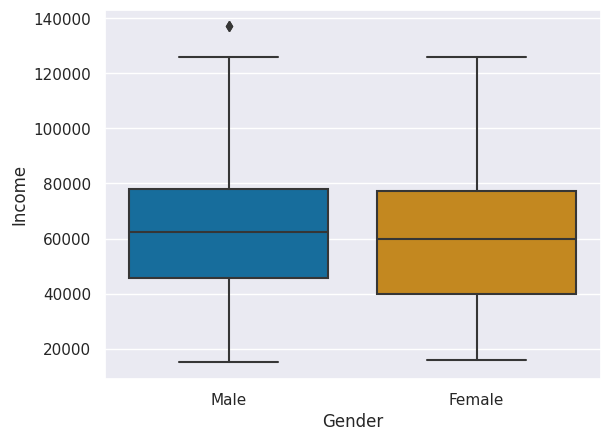

In [13]:
ax = sns.boxplot(
    data=customers,
    x = 'Gender',
    y = 'Income',
    palette = 'colorblind'
)

- We can see that is not significant difference between Gender x Income

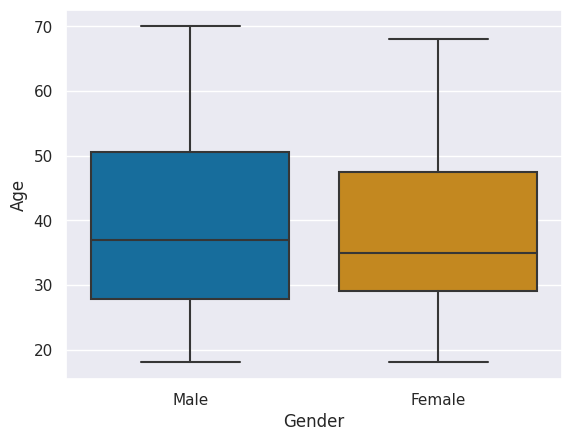

In [14]:
ax = sns.boxplot(
    data=customers,
    x = 'Gender',
    y = 'Age',
    palette = 'colorblind'
)

- We can see that is not significant difference between Gender x Age

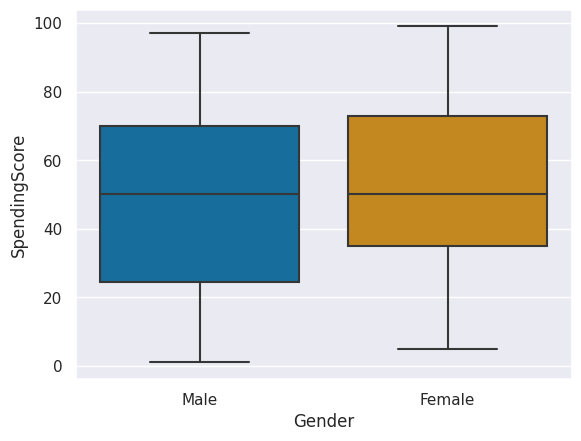

In [16]:
ax = sns.boxplot(
    data=customers,
    x = 'Gender',
    y = 'SpendingScore',
    palette = 'colorblind'
)

- We can see that is not significant difference between Gender x SpendingScore

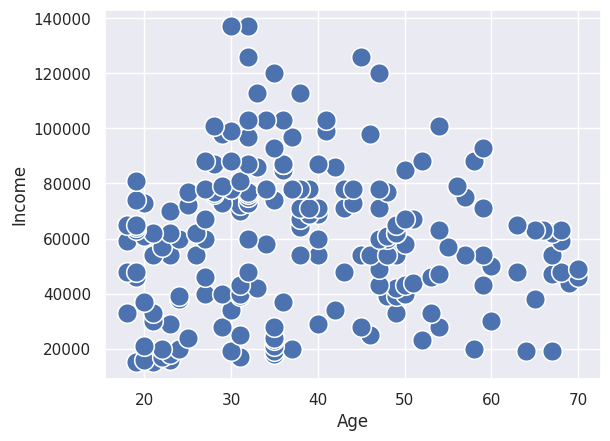

In [23]:
ax = sns.scatterplot(
    data=customers,
    x = 'Age',
    y = 'Income',
    s = 200
)

- There appears to be a slight positive linear relationship between Income and Age, between the ages of 20 and 40, and the relationship appears to turn negative to age > 50

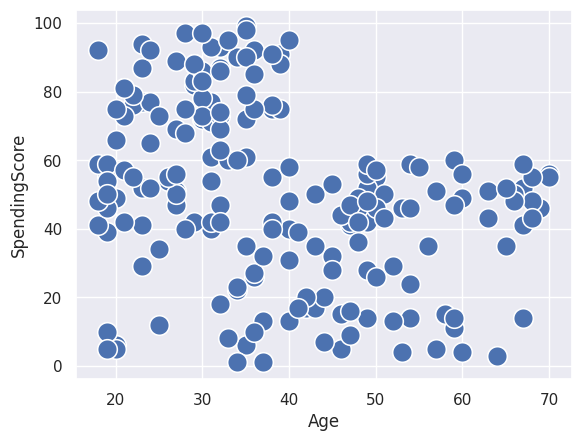

In [24]:
ax = sns.scatterplot(
    data=customers,
    x = 'Age',
    y = 'SpendingScore',
    s = 200
)

- A stronger positive relationship between SpendingScore and Age < 40

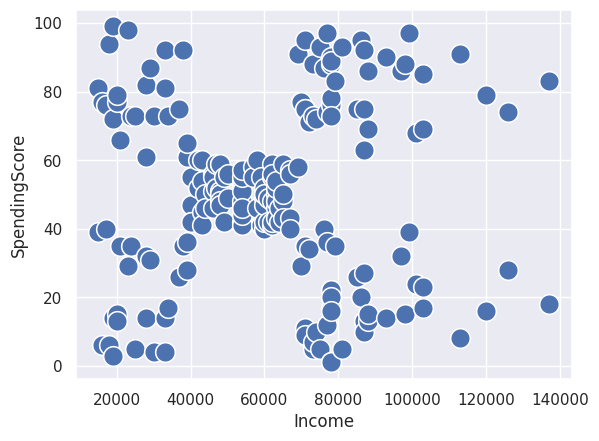

In [25]:
ax = sns.scatterplot(
    data=customers,
    x = 'Income',
    y = 'SpendingScore',
    s = 200
)

- There isn't a clear linear relationship between Income and SpendingScore, but we can see somewhat of a sense of the possible clusters. 
- There is a significant difference between the range of values between Income and SpendingScore

In [29]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00
